# Air Quality Index

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
df=pd.read_csv('/content/city_day.csv',parse_dates = ["Date"])
selected_rows = df[df['City'] == 'Delhi']
df=selected_rows
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [ ]:
df.shape

(2009, 16)

# Features
-->City    
-->Date   
-->PM2.5 (Particulate Matter 2.5-micrometer)              
-->PM10 (Particulate Matter 10-micrometer)              
-->SO2 (Sulphur Dioxide)            
-->NOx (Any Nitric x-oxide)       
-->NH3 (Ammonia)        
-->CO (Carbon Monoxide)        
-->O3 (Ozone or Trioxygen)        
-->Benzene         
-->Toluene      
-->Xylene     
-->AQI           
-->AQI_Bucket                 


<Axes: >

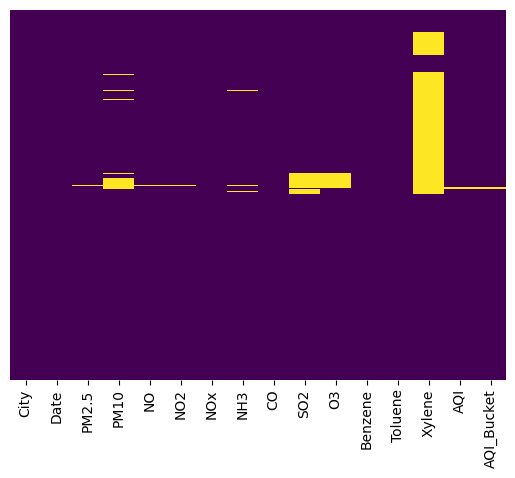

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

yellow - null values

PM2.5,PM10,NO,NO2,NH3,SO2,O3,Xylen,AQI,AQI_Bucket  has empty values

In [ ]:
print(df.isnull().sum())

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64


In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Xylene        38.875062
SO2            5.475361
O3             4.181185
PM10           3.832753
AQI            0.497760
AQI_Bucket     0.497760
NH3            0.447984
PM2.5          0.099552
NO             0.099552
NO2            0.099552
City           0.000000
Date           0.000000
NOx            0.000000
CO             0.000000
Benzene        0.000000
Toluene        0.000000
dtype: float64

In [ ]:
df.describe() # but it gives the information about all the cities alltogether

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2007.000000,1932.000000,2007.000000,2007.000000,2009.000000,2000.000000,2009.000000,1899.000000,1925.00000,2009.000000,2009.000000,1228.000000,1999.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.32361,3.544480,17.185042,1.438339,259.487744
std,82.912945,121.873025,33.389456,22.696721,37.690350,17.301221,2.560253,7.966770,26.06234,2.431232,15.291597,2.377762,119.537333
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.94000,0.000000,0.000000,0.000000,29.000000
25%,57.095000,137.040000,15.895000,33.895000,31.150000,31.157500,0.910000,10.335000,33.71000,1.870000,6.650000,0.110000,161.500000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.44000,2.960000,12.750000,0.650000,257.000000
75%,153.030000,311.667500,50.790000,63.570000,75.360000,48.792500,1.870000,19.700000,60.84000,4.680000,23.200000,1.970000,345.500000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.73000,20.640000,103.000000,23.300000,716.000000


In [ ]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

### Filling the Nan values present in the pollutants with mean (city wise)

In [ ]:
df.iloc[:, 0:13]=df.fillna(df.median())

<ipython-input-91-7007df8cd00c>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: ylabel='Date'>

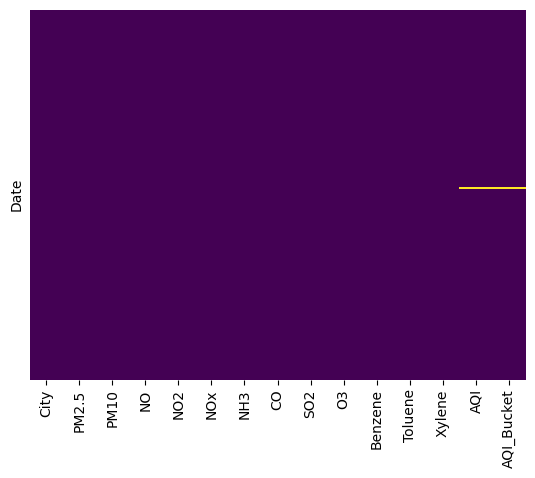

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
-->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

-->For CO and O3 the maximum value in last 8-hrs is used.

-->Each measure is converted into a Sub-Index based on pre-defined groups.

-->Sometimes measures are not available due to lack of measuring or lack of required data points.

-->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

###  Calculating Sub-Index

In [ ]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))



### Filling the Nan values of AQI column by taking maximum values out of sub-Indexes

In [ ]:

df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))

<Axes: ylabel='Date'>

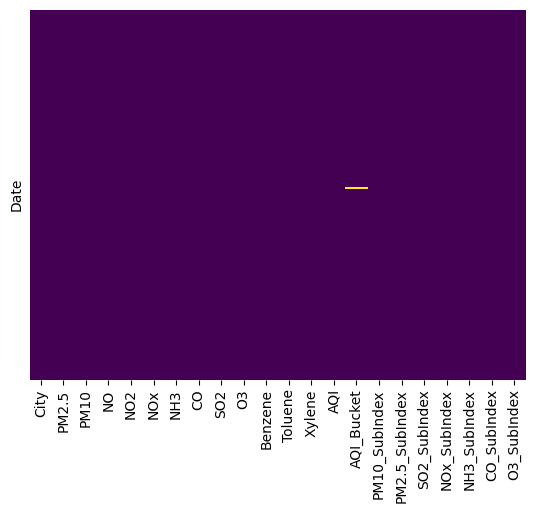

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Calculating AQI bucket and filling the NAN value present

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))


<Axes: ylabel='Date'>

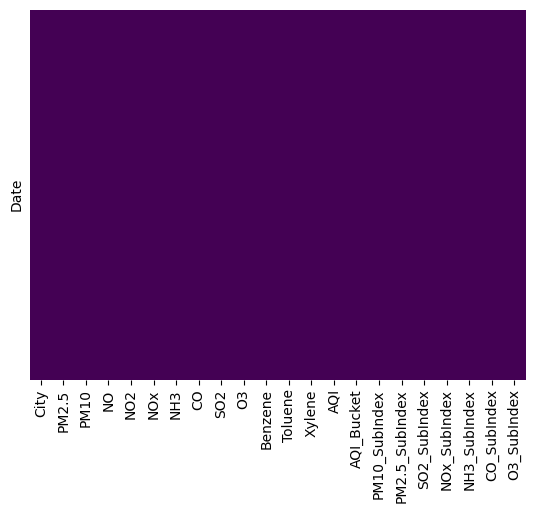

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df = df.drop(['PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'], axis=1)

In [ ]:
df3=df.copy()

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

<ipython-input-101-57ee90f37e98>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

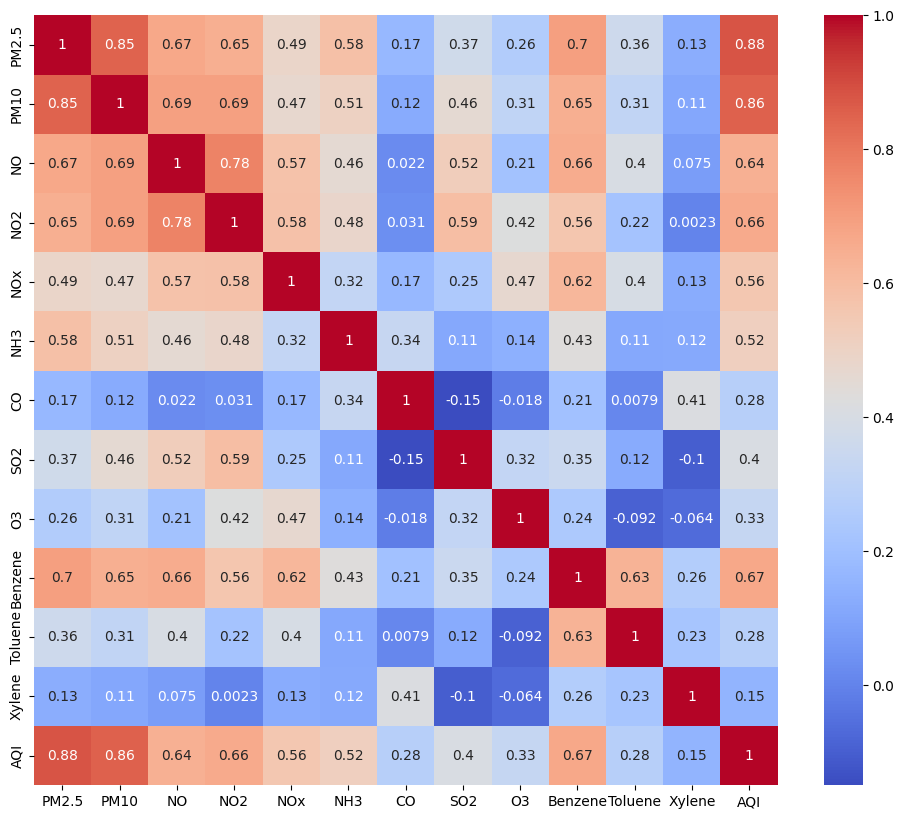

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

there are no very highly correlated values 0.9 to 1

aqi is highly correalted with'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3''Benzene'

Distribution of different pollutants in last 5 years


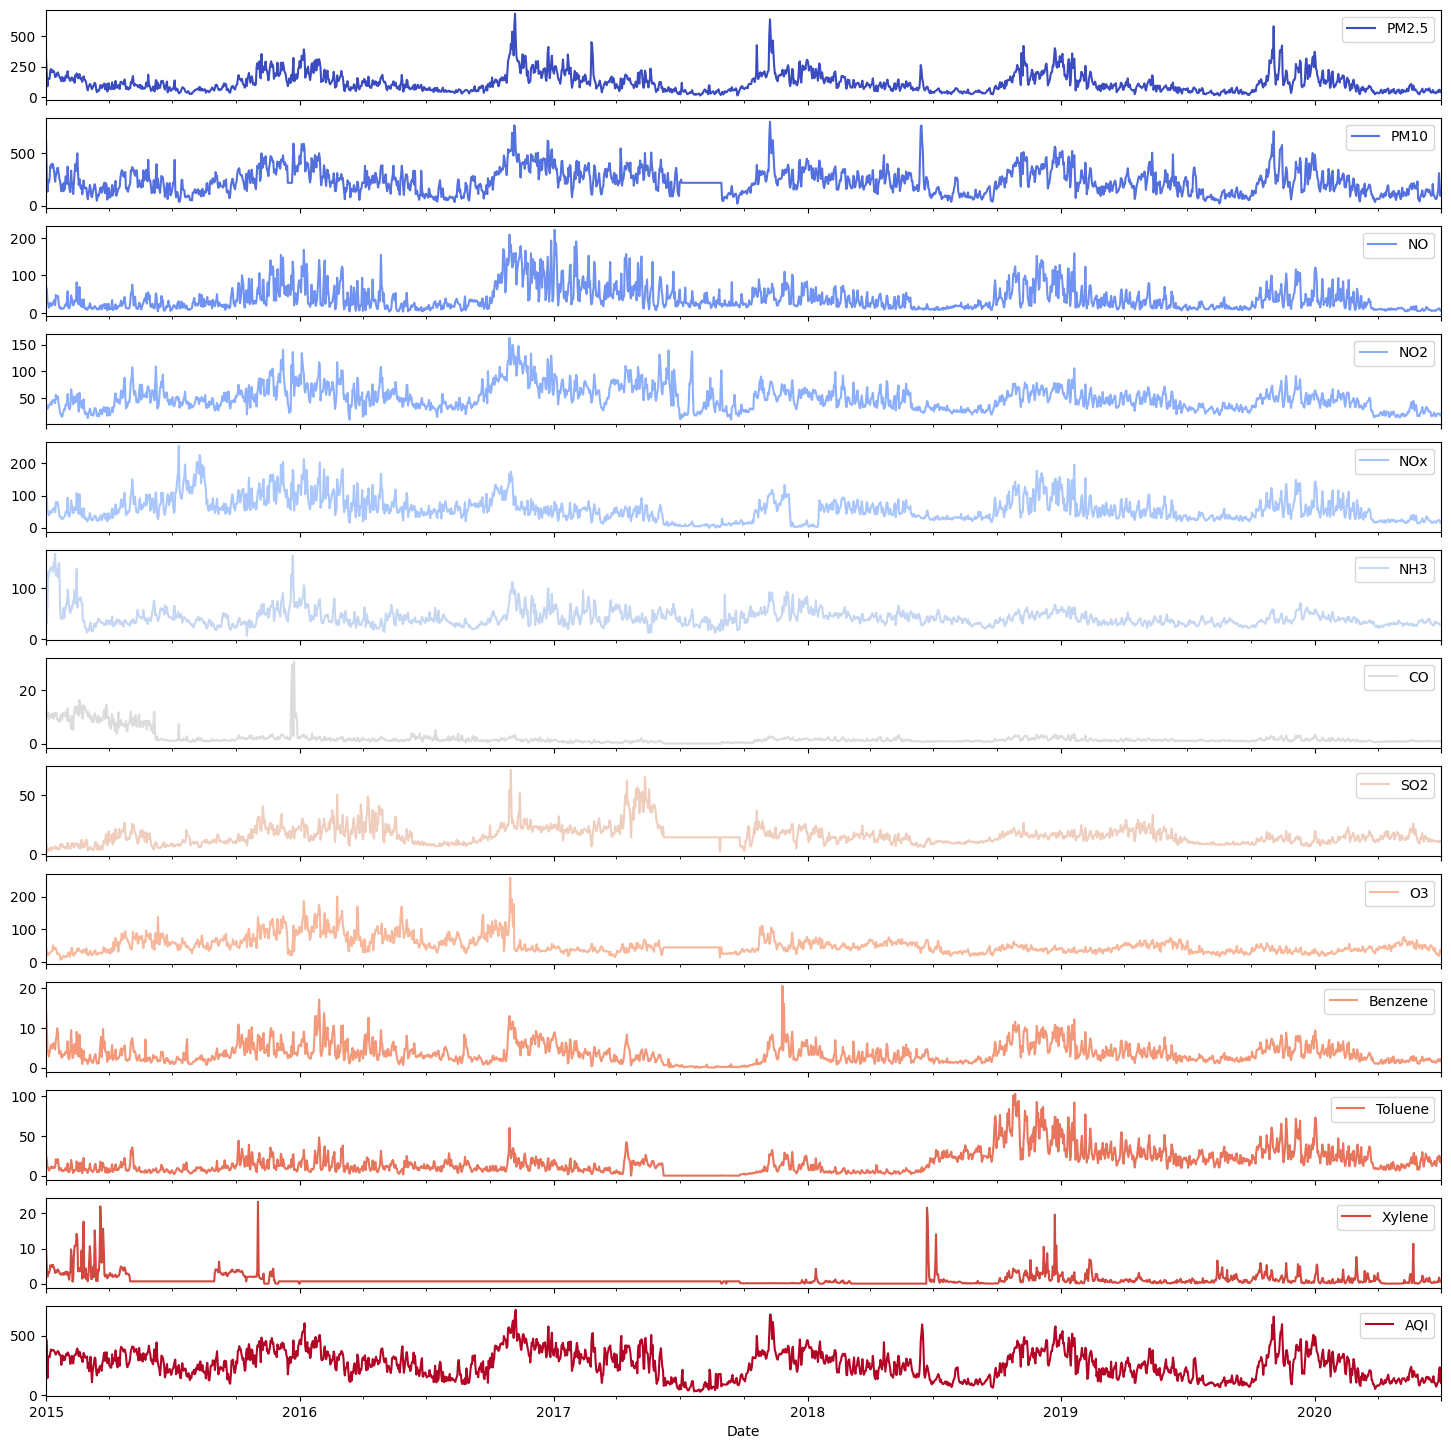

In [ ]:
pollutants = ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
df = df[pollutants]
print('Distribution of different pollutants in last 5 years')
df.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

NH3 (Ammonia): There was a similar level.

CO (Carbon Monoxide) and SO2 (Sulphur Dioxide): Its level with a slight
seasonal effect.

O3 (Ozone): Ozone levels decreased after 2017

BTX increase after 2019

Particulate Matter and Nitrogen Oxides show high seasonal effects.

In [ ]:
df1=df.drop(columns=['City','AQI_Bucket'])


NameError: ignored

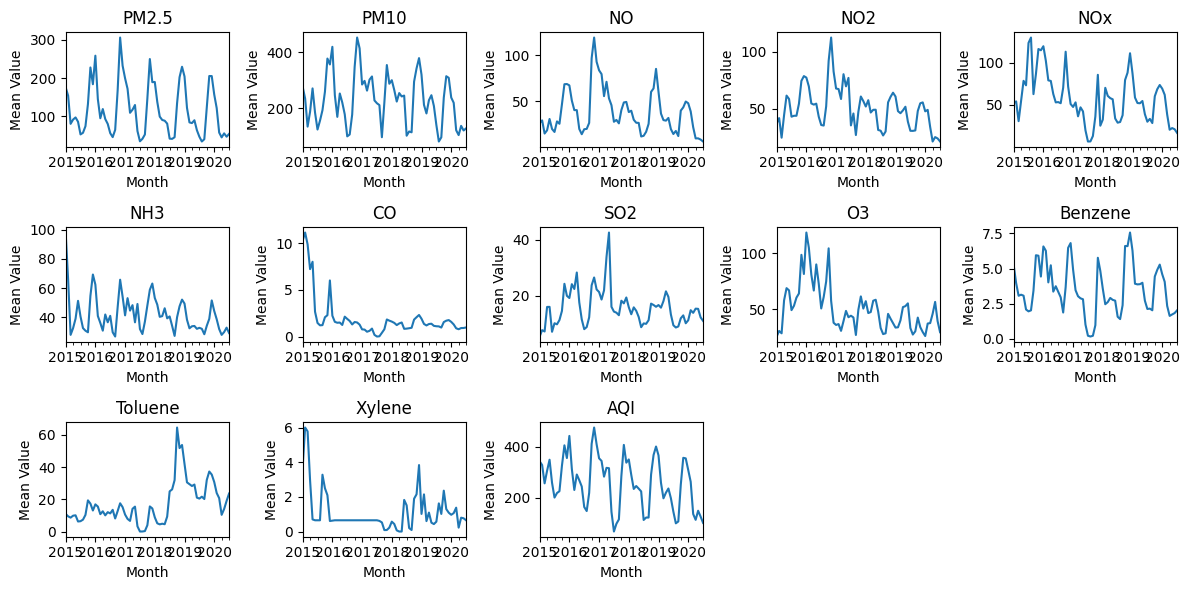

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df1.columns):
    plt.subplot(3, 5, i + 1)
    df1[column].resample('M').mean().plot()
    plt.title(column)
    plt.xlabel('Month')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()

seasonality can be seen

In [ ]:
category_counts = df['AQI_Bucket'].value_counts()

# Create a bar graph
category_counts.plot(kind='bar', color=['red', 'orange', 'purple', 'maroon', 'yellow', 'green'])

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Air Quality Categories')

# Show the graph
plt.show()

the values avaible are more in poor > moderate > very_poor > servere > satisfactory > good

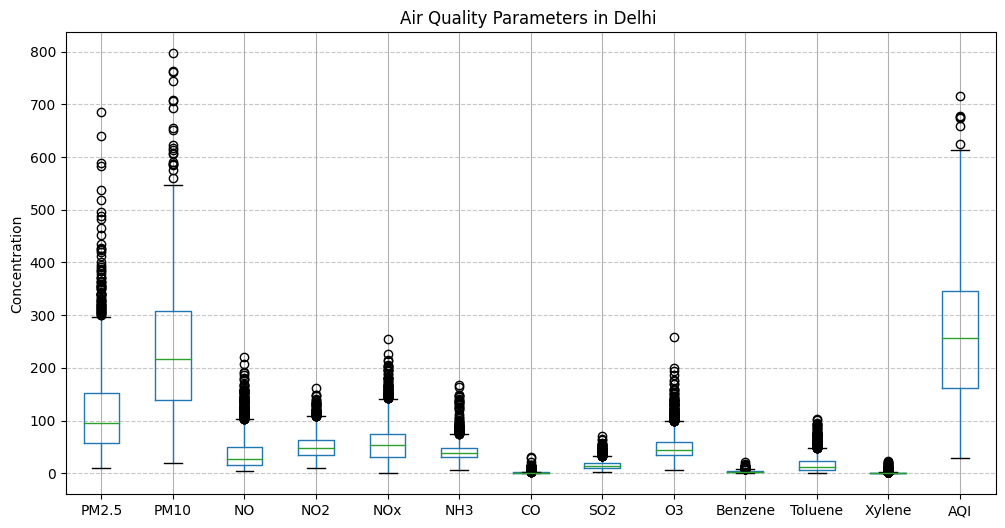

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.title('Air Quality Parameters in Delhi ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
boxplot = df.boxplot(column=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'])
plt.ylabel('Concentration')
plt.show()

There are many outliers for each column
the impact of ouliers need to be reduced

<ipython-input-107-a2abc47d5144>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



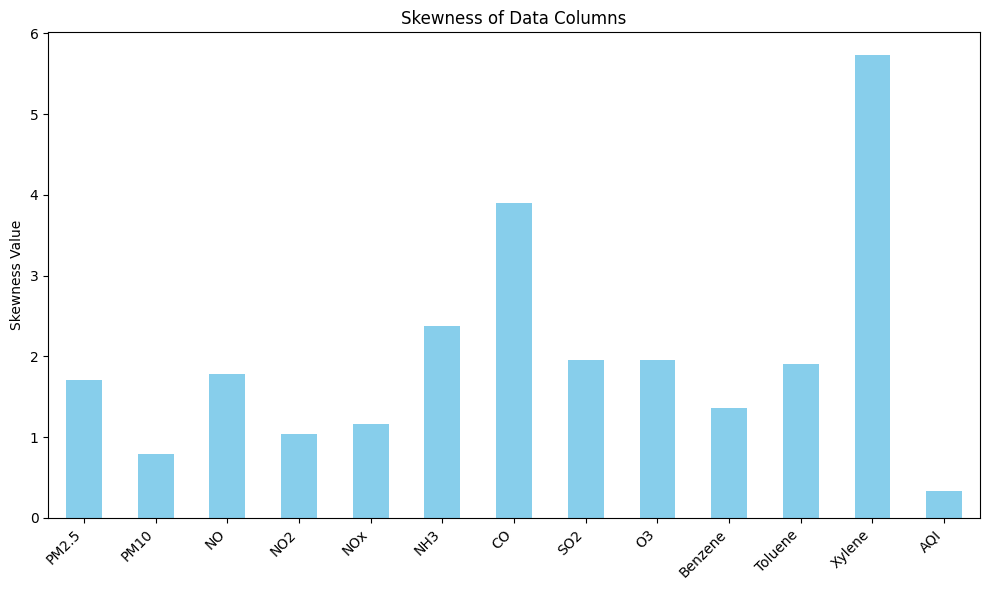

In [ ]:
skewness = df.skew()
import matplotlib.pyplot as plt
# Create a bar graph to visualize skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Data Columns')
plt.ylabel('Skewness Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot or save it to a file
plt.show()

 skewed value distribution xylene has highest and CO,NH3 have high skewness

In [ ]:
df['f'] = 0
import plotly.express as px

fig = px.scatter(df, x="AQI", y="f")
fig.add_scatter(x=df["AQI"], y=df["PM2.5"], mode='markers', name='PM2.5', marker=dict(color='yellow'))
fig.add_scatter(x=df["AQI"], y=df["PM10"], mode='markers', name='PM10', marker=dict(color='red'))
fig.add_scatter(x=df["AQI"], y=df["NO"], mode='markers', name='NO', marker=dict(color='blue'))
fig.add_scatter(x=df["AQI"], y=df["NO2"], mode='markers', name='NO2', marker=dict(color='green'))
fig.add_scatter(x=df["AQI"], y=df["NOx"], mode='markers', name='NOx', marker=dict(color='purple'))
fig.add_scatter(x=df["AQI"], y=df["NH3"], mode='markers', name='NH3', marker=dict(color='orange'))
fig.add_scatter(x=df["AQI"], y=df["CO"], mode='markers', name='CO', marker=dict(color='brown'))
fig.add_scatter(x=df["AQI"], y=df["SO2"], mode='markers', name='SO2', marker=dict(color='pink'))
fig.add_scatter(x=df["AQI"], y=df["O3"], mode='markers', name='O3', marker=dict(color='gray'))
fig.add_scatter(x=df["AQI"], y=df["Benzene"], mode='markers', name='Benzene', marker=dict(color='violet'))
fig.add_scatter(x=df["AQI"], y=df["Toluene"], mode='markers', name='Toluene', marker=dict(color='cyan'))
fig.add_scatter(x=df["AQI"], y=df["Xylene"], mode='markers', name='Xylene', marker=dict(color='magenta'))
fig.show()



positive correlated

In [ ]:
df=df.drop(columns=['f'])

In [ ]:
sns.pairplot(df3)
plt.show()

# normlaise and scale (feature engineering)

In [ ]:
# Iterate through each column and create displot with PDF
for column in df3.columns:
    sns.displot(df3[column], kde=True, stat='density')
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
from scipy import stats
numerical_columns = df.select_dtypes(include=[float, int]).columns
# Apply the Box-Cox transformation to each numerical column
for col in numerical_columns:
    transformed_col, _ = stats.boxcox(df[col] + 1)
    df[col] = transformed_col

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
# Define the features and the target variable
X = df.drop(columns=['City', 'AQI','AQI_Bucket'])
y = df['AQI']
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.44211609 0.25523303 0.04188171 0.04491163 0.03889921 0.01331774
 0.05583234 0.00955659 0.0139718  0.04488276 0.0338497  0.00554742]


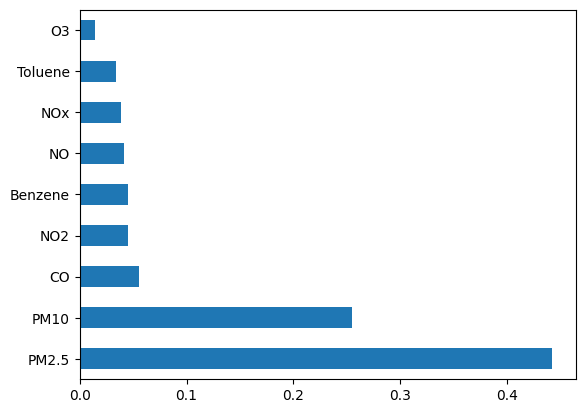

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()


PM2.5	PM10	CO	NO2	Benzene	NO	NOx	Toluene	O3 top 9 important columns

In [ ]:
top_9_features = feat_importances.nlargest(9)
selected_columns = df[top_9_features.index]
selected_columns

,PM2.5,PM10,CO,NO2,Benzene,NO,NOx,Toluene,O3
Date,,,,,,,,,
2015-01-01,1.798629,2.378186,2.466472,-0.551529,2.749430,1.124602,1.309142,0.750761,-0.184827
2015-01-02,1.009113,0.455920,2.173128,-0.771681,2.127467,0.996562,0.877421,0.483213,-0.991264
2015-01-03,-0.114629,-0.807938,2.247099,-0.944977,0.378085,-0.103013,-0.101862,-0.258817,-2.101571
2015-01-04,0.703810,0.241373,2.302531,-0.520585,0.512675,-0.139932,-0.082151,-0.309837,-1.422265
2015-01-05,0.651463,0.053841,2.146871,-0.641124,-0.113648,-0.910486,-0.407535,-0.711813,-1.658228
...,...,...,...,...,...,...,...,...,...
2020-06-27,-1.237121,-0.541852,-0.511133,-1.661181,-0.754176,-1.254533,-1.022994,0.477146,-2.220976
2020-06-28,-0.666363,0.736485,-0.413509,-1.648022,-0.740704,-1.046863,-0.960241,0.764776,-2.346814
2020-06-29,-1.068648,-0.260574,-0.496807,-1.650836,-0.476394,-1.303154,-1.047509,0.694669,-1.296540


In [ ]:
df5=df.copy()

In [ ]:
#Iterate through each column and create displot with PDF
for column in df.columns:
    sns.displot(df[column], kde=True, stat='density')
    plt.title(f'Distribution of {column}')
    plt.show()


In [ ]:
top_9_features = feat_importances.nlargest(9)
selected_columns = df[top_9_features.index]
selected_columns

,PM2.5,PM10,CO,NO2,Benzene,NO,NOx,Toluene,O3
Date,,,,,,,,,
2015-01-01,1.798629,2.378186,2.466472,-0.551529,2.749430,1.124602,1.309142,0.750761,-0.184827
2015-01-02,1.009113,0.455920,2.173128,-0.771681,2.127467,0.996562,0.877421,0.483213,-0.991264
2015-01-03,-0.114629,-0.807938,2.247099,-0.944977,0.378085,-0.103013,-0.101862,-0.258817,-2.101571
2015-01-04,0.703810,0.241373,2.302531,-0.520585,0.512675,-0.139932,-0.082151,-0.309837,-1.422265
2015-01-05,0.651463,0.053841,2.146871,-0.641124,-0.113648,-0.910486,-0.407535,-0.711813,-1.658228
...,...,...,...,...,...,...,...,...,...
2020-06-27,-1.237121,-0.541852,-0.511133,-1.661181,-0.754176,-1.254533,-1.022994,0.477146,-2.220976
2020-06-28,-0.666363,0.736485,-0.413509,-1.648022,-0.740704,-1.046863,-0.960241,0.764776,-2.346814
2020-06-29,-1.068648,-0.260574,-0.496807,-1.650836,-0.476394,-1.303154,-1.047509,0.694669,-1.296540


In [ ]:
X=selected_columns
y= df3['AQI']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model

Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
tree= RandomForestRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 24.60676616915423
MSE: 1205.3567240464345
RMSE: 34.71824770990659
R^2: 0.9143778412396982


KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 32.981757877280266
MSE: 2151.257048092869
RMSE: 46.38164559492115
R^2: 0.8471860911949167


XBoost regressor

In [ ]:
import xgboost as xgb
tree1= xgb.XGBRegressor()
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 26.40316642457573
MSE: 1438.1105506556664
RMSE: 37.922428069094764
R^2: 0.897844241935501


# Prediction

In [ ]:
import random

# Get the number of rows in the DataFrame
num_rows = df3.shape[0]
# Generate a random row index
random_row_index = random.randint(0, num_rows - 1)
# Select the random row
random_data = df3.iloc[random_row_index, :]
random_data1 = df5.iloc[random_row_index, :]
random_data

City           Delhi
PM2.5          40.87
PM10          233.62
NO             23.35
NO2            70.77
NOx             22.9
NH3            48.84
CO              0.29
SO2            23.51
O3             39.61
Benzene         1.11
Toluene         7.26
Xylene          0.65
AQI            210.0
AQI_Bucket      Poor
Name: 2017-06-07 00:00:00, dtype: object

In [ ]:
top_9_features = feat_importances.nlargest(9)
selected_column = random_data1[top_9_features.index]

In [ ]:
y_pred1 = tree.predict(selected_column.values.reshape(1, -1))
y_pred2 = knn.predict(selected_column.values.reshape(1, -1))
y_pred3 = tree1.predict(selected_column.values.reshape(1, -1))
y1=int((y_pred1+y_pred2+y_pred3)/3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [ ]:
import plotly.graph_objects as go

value1 = y1

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=value1,
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': "AQI", 'font': {'size': 44}},
    gauge={
        'axis': {
            'range': [0, 500],
            'tickvals': [0, 50, 100, 200, 300, 400, 500],
            'ticktext': ["0", "50", "100", "200", "300", "400"],
            'tickwidth': 1,
            'tickcolor': "darkblue"
        },
        'bar': {'color': "black"},
        'bgcolor': "white",
        'borderwidth': 1,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 50], 'color': 'green'},
            {'range': [50, 100], 'color': 'yellow'},
            {'range': [100, 200], 'color': 'orange'},
            {'range': [200, 300], 'color': 'red'},
            {'range': [300, 400], 'color': 'purple'},
            {'range': [400, 500], 'color': 'maroon'},
        ],
    }
))

fig.update_layout(paper_bgcolor="grey", font={ 'family': "Arial"})

# Add annotation to display AQI level
if (0 <= value1 < 51):
    aqi_level = "Good"
    fig.update_layout(font={'color': "green"})
elif (51 <= value1 < 101):
    aqi_level = "Satisfactory"
    fig.update_layout(font={'color': "yellow"})
elif (101 <= value1 < 201):
    aqi_level = "Moderate"
    fig.update_layout(font={'color': "orange"})
elif (201 <= value1 < 301):
    aqi_level = "Poor"
    fig.update_layout(font={'color': "red"})
elif (301 <= value1 < 401):
    aqi_level = "Very Poor"
    fig.update_layout(font={'color': "purple"})
else:
    aqi_level = "Severe"
    fig.update_layout(font={'color': "maroon"})

fig.add_annotation(
    text=aqi_level,
    x=0.5,
    y=0.5,
    showarrow=False,
    font={'size': 28},
)

fig.show()


# Hyperparameter tuning

randomforestregressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['1.0', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['1.0', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['1.0', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
rf_random.best_score_

-1125.6282737905005

In [ ]:
from sklearn.ensemble import RandomForestRegressor
tree= RandomForestRegressor(**rf_random.best_params_)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 24.648218466724128
MSE: 1167.7641945572457
RMSE: 34.17256493968876
R^2: 0.9170482154649476


knnregessor

In [ ]:

mse_values = []
from sklearn.model_selection import cross_val_score
# Will take some time
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    mse = -np.mean(cross_val_score(knn, X, y, cv=10, scoring="neg_mean_squared_error"))
    mse_values.append(mse)
optimal_k = int(np.argmin(mse_values) + 1)
min_mse = mse_values[optimal_k - 1]
if optimal_k %2==0:
  optimal_k+=1
print(f"The optimal value of k is {optimal_k} with a negative mean squared error of {min_mse}")


The optimal value of k is 5 with a negative mean squared error of 2647.164137748756


Text(0, 0.5, 'Accuracy Rate')

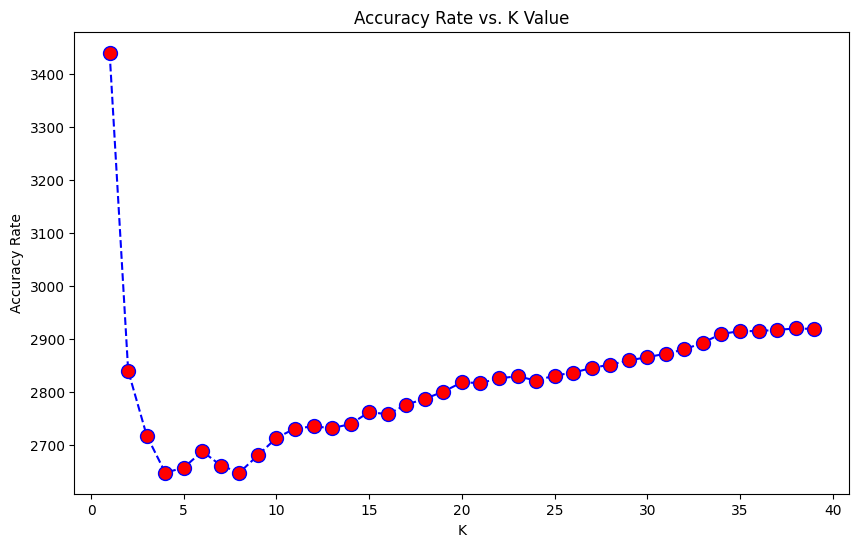

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),mse_values,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

k values peak at 4 or 5
some some time increasing k decrease accuracy rate

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 27.67927031509121
MSE: 1533.9292205638476
RMSE: 39.165408469258274
R^2: 0.89103779102897


xgboost

In [ ]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
regressor=xgb.XGBRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation,
# search across  different combination
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   7.8s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   5.6s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   7.7s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   5.5s
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   7.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   2.1s
[CV] END learnin

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=25, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': '0.05'}

In [ ]:
xg_random.best_score_

-1161.3187046556664

In [ ]:
import xgboost as xgb
tree1= xgb.XGBRegressor(**xg_random.best_params_)
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('R^2:', r2)

MAE: 25.937554281940113
MSE: 1369.4226211426333
RMSE: 37.00571065582491
R^2: 0.9027234687140583


# loss curve

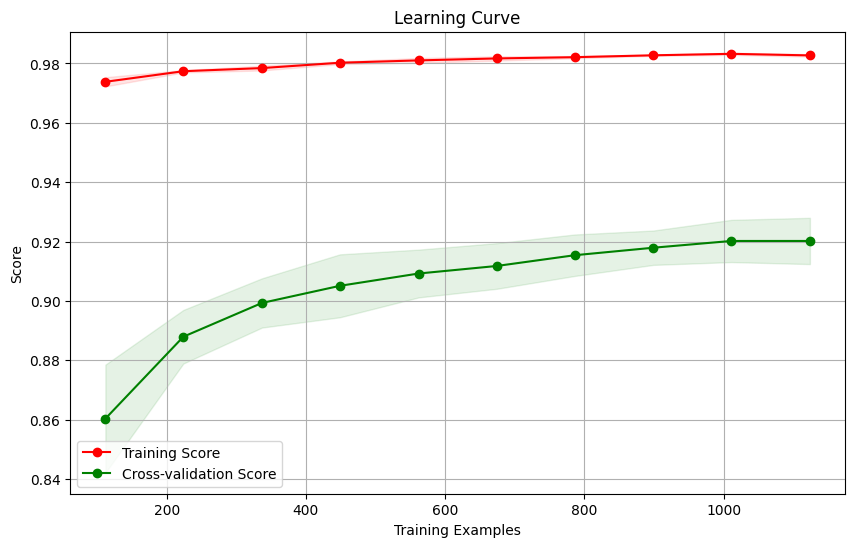

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

there is no overfitting and underfitting

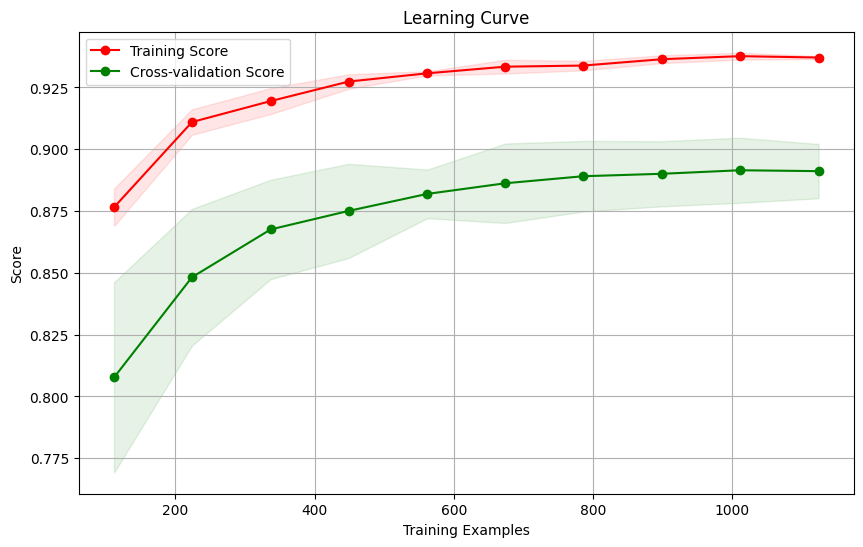

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

there is no overfitting and underfitting

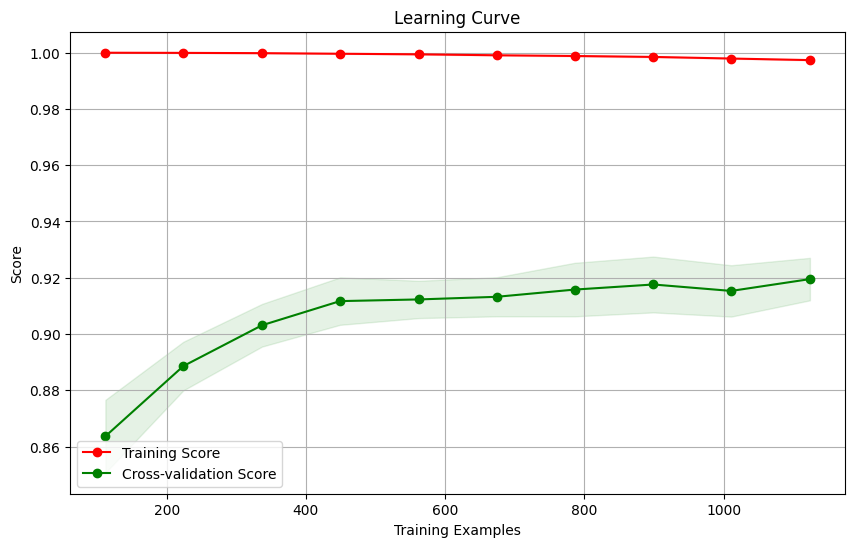

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(tree1, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()

there is no overfitting and underfitting

# evaluation metric

In [ ]:
tree= RandomForestRegressor(**rf_random.best_params_)
tree.fit(X_train, y_train)
y_pred1= tree.predict(X_test)
y2=metrics.mean_absolute_error(y_test, y_pred1)
y3=metrics.mean_squared_error(y_test, y_pred1)
y4=np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
y5 = r2_score(y_test, y_pred1)
knn=KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred2= knn.predict(X_test)
y6=metrics.mean_absolute_error(y_test, y_pred2)
y7=metrics.mean_squared_error(y_test, y_pred2)
y8=np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
y9 = r2_score(y_test, y_pred2)
tree1= xgb.XGBRegressor(**xg_random.best_params_)
tree1.fit(X_train, y_train)
y_pred3= tree1.predict(X_test)
y10=metrics.mean_absolute_error(y_test, y_pred3)
y11=metrics.mean_squared_error(y_test, y_pred3)
y12=np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
y13= r2_score(y_test, y_pred3)

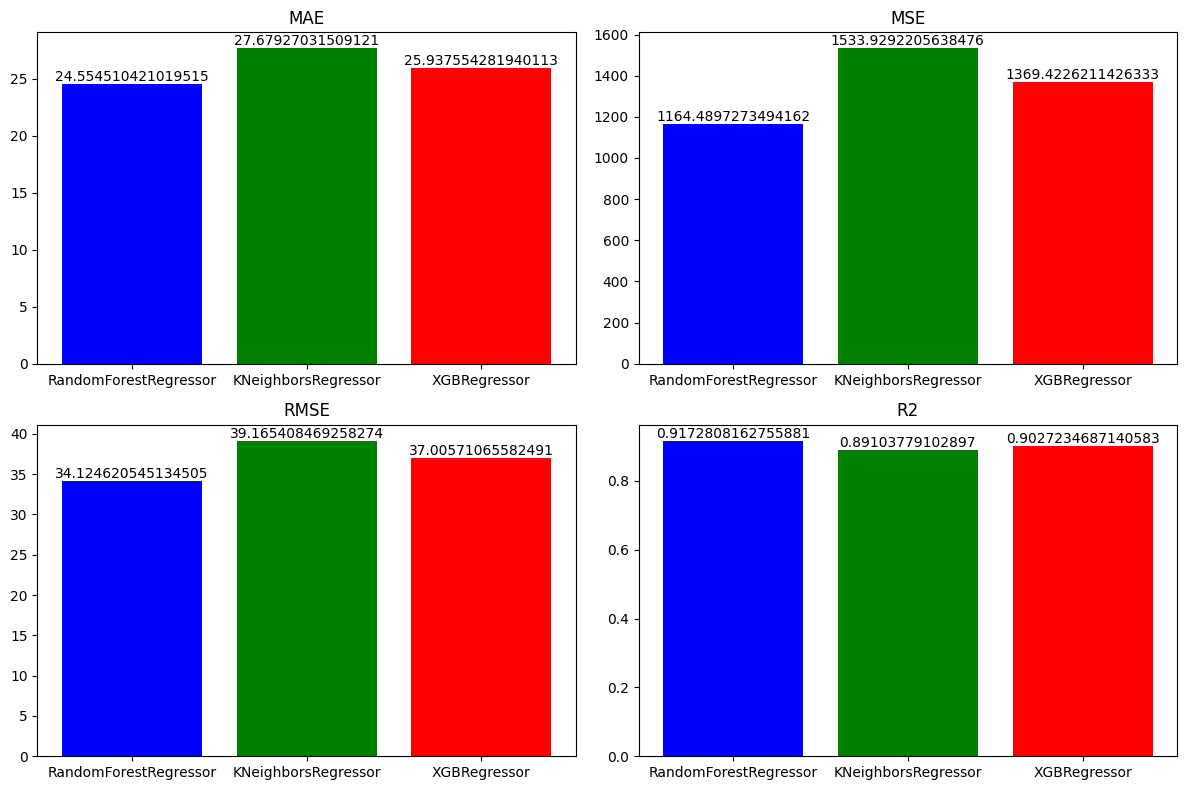

In [ ]:
import matplotlib.pyplot as plt

# Assuming that mae_values, mse_values, rmse_values, r2_values are lists containing the values for each model
models = ['RandomForestRegressor', 'KNeighborsRegressor', 'XGBRegressor']
mae_values = [y2, y6, y10]
mse_values = [y3, y7, y11]
rmse_values = [y4, y8, y12]
r2_values = [y5, y9, y13]

x = range(len(models))

fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Function to add value labels
def add_labels(ax, values):
    for i in range(len(values)):
        ax.text(i, values[i], str(values[i]), ha='center', va='bottom')

# Colors for each model
colors = ['b', 'g', 'r']

# Subplot for MAE
axs[0, 0].bar(x, mae_values, color=colors, align='center')
axs[0, 0].set_title('MAE')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models)
add_labels(axs[0, 0], mae_values)

# Subplot for MSE
axs[0, 1].bar(x, mse_values, color=colors, align='center')
axs[0, 1].set_title('MSE')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models)
add_labels(axs[0, 1], mse_values)

# Subplot for RMSE
axs[1, 0].bar(x, rmse_values, color=colors, align='center')
axs[1, 0].set_title('RMSE')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models)
add_labels(axs[1, 0], rmse_values)

# Subplot for R2
axs[1, 1].bar(x, r2_values, color=colors, align='center')
axs[1, 1].set_title('R2')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models)
add_labels(axs[1, 1], r2_values)

# Display the plot
plt.tight_layout()
plt.show()


best model is   'KNeighborsRegressor'> 'XGBRegressor' >'RandomForestRegressor',

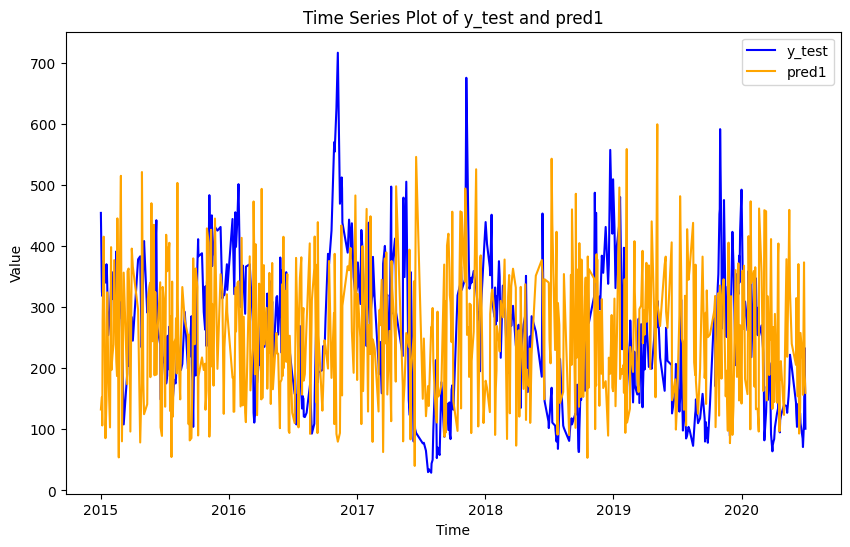

In [ ]:
import matplotlib.pyplot as plt

# Sort y_test and pred1 by index
y_test = y_test.sort_index()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot y_test in blue
plt.plot(y_test.index, y_test, color='blue', label='y_test')

# Plot pred1 in orange
plt.plot(y_test.index, y_pred1, color='orange', label='pred1')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot of y_test and pred1')
plt.legend()

# Show the plot
plt.show()


almost y_test and y_pred are similar

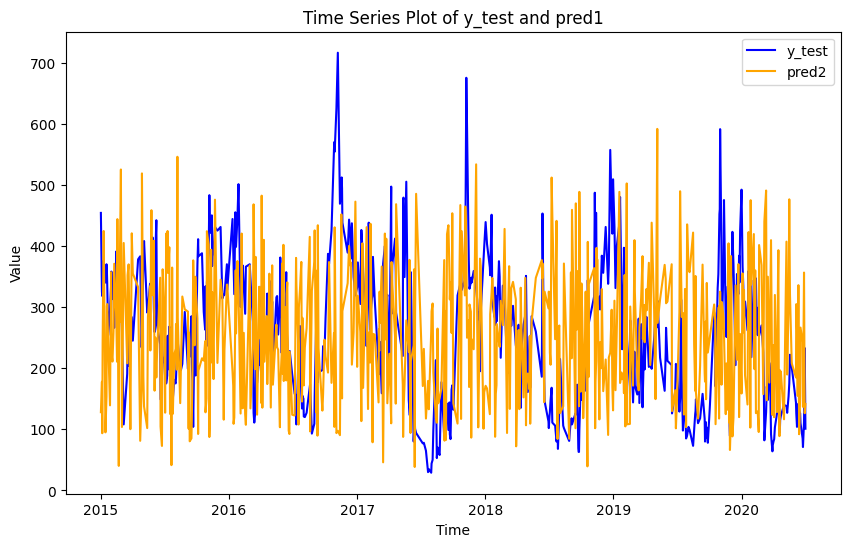

In [ ]:
import matplotlib.pyplot as plt

# Sort y_test and pred1 by index
y_test = y_test.sort_index()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot y_test in blue
plt.plot(y_test.index, y_test, color='blue', label='y_test')

# Plot pred1 in orange
plt.plot(y_test.index, y_pred2, color='orange', label='pred2')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot of y_test and pred1')
plt.legend()

# Show the plot
plt.show()


almost y_test and y_pred are similar

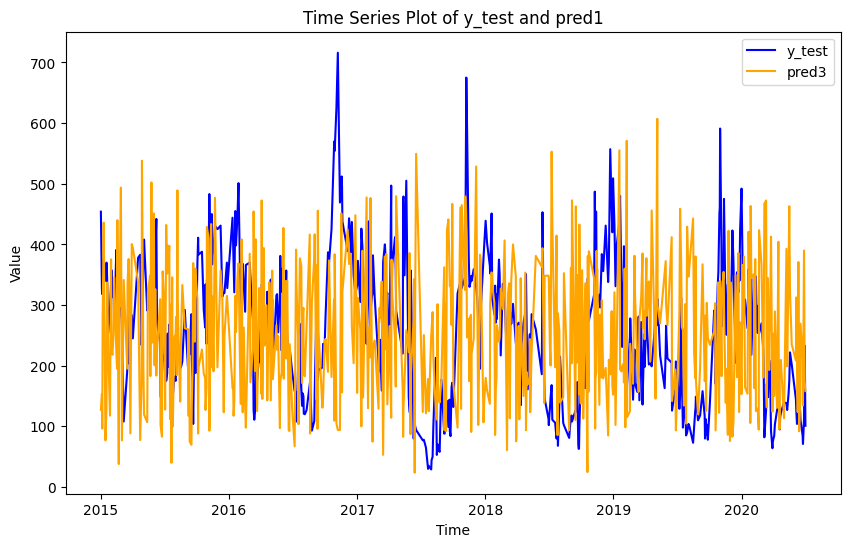

In [ ]:
import matplotlib.pyplot as plt

# Sort y_test and pred1 by index
y_test = y_test.sort_index()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot y_test in blue
plt.plot(y_test.index, y_test, color='blue', label='y_test')

# Plot pred1 in orange
plt.plot(y_test.index, y_pred3, color='orange', label='pred3')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot of y_test and pred1')
plt.legend()

# Show the plot
plt.show()


almost y_test and y_pred are similar

# error

error histogram plot

<ipython-input-226-aa9624c28f8e>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-226-aa9624c28f8e>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-226-aa9624c28f8e>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

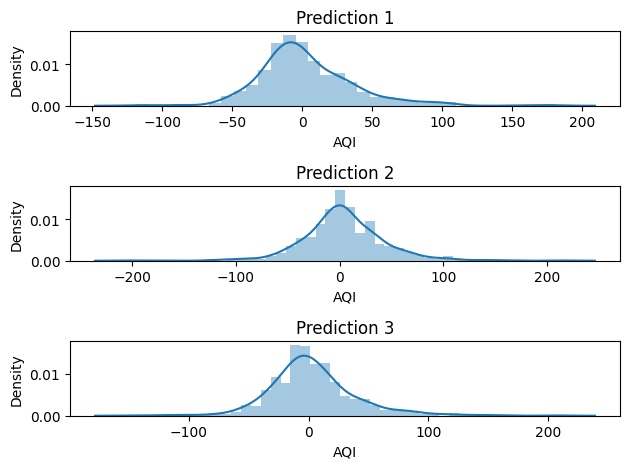

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and 3 subplots
fig, axs = plt.subplots(3)

# Plot the distributions
sns.distplot(y_test-y_pred1, ax=axs[0],kde=False)
axs[0].set_title('randomforestregressor')

sns.distplot(y_test-y_pred2, ax=axs[1],kde=False)
axs[1].set_title('KNeighborsRegressor')

sns.distplot(y_test-y_pred3, ax=axs[2],kde=False)
axs[2].set_title('XGBRegressor')

# Show the plot
plt.tight_layout()
plt.show()


its normal.it suggests that the errors are random and not biased in any particular direction

Residual vs Fitted Values

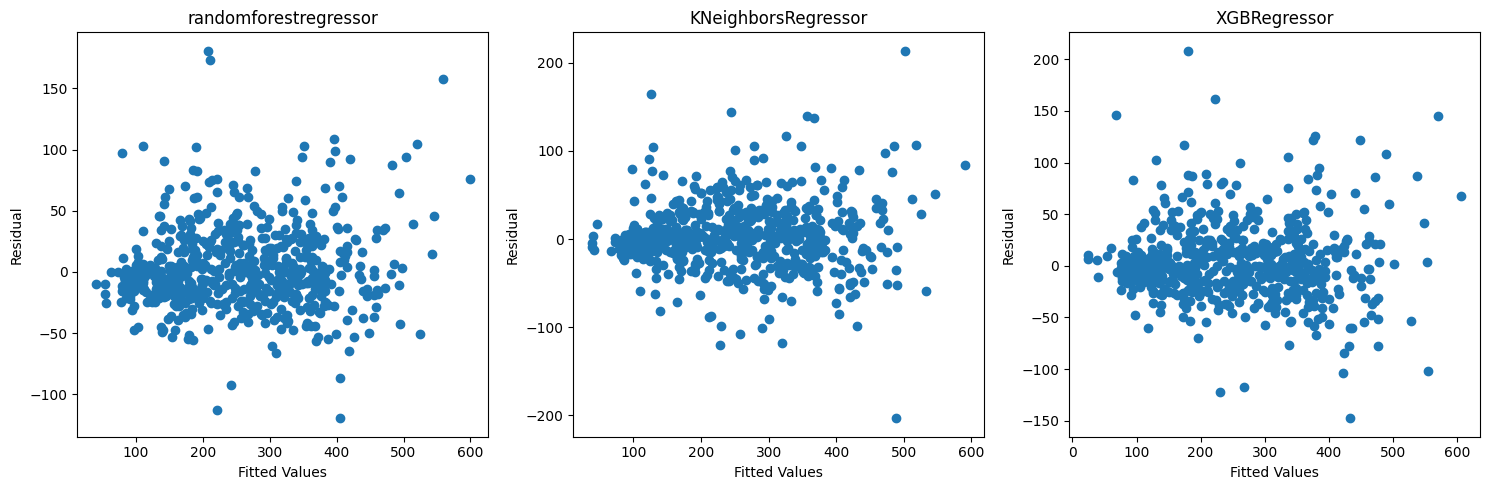

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Residual vs. Fitted Values for Prediction 1
axs[0].scatter(y_pred1,y_test-y_pred1 )
axs[0].set_title('randomforestregressor')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 2
axs[1].scatter(y_pred2, y_test-y_pred2)
axs[1].set_title('KNeighborsRegressor')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 3
axs[2].scatter(y_pred3, y_test-y_pred3)
axs[2].set_title('XGBRegressor')
axs[2].set_xlabel('Fitted Values')
axs[2].set_ylabel('Residual')

# Show the plot
plt.tight_layout()
plt.show()

no pattern is evident
no signs of non-linearity in the data. It means that the model doesn't capture non-linear effects.

Normal Q-Q Plot

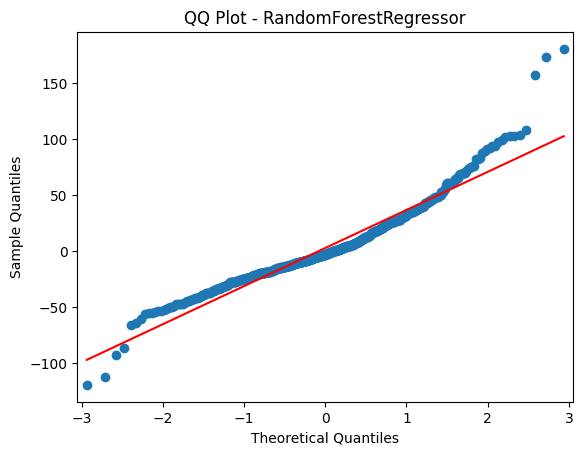

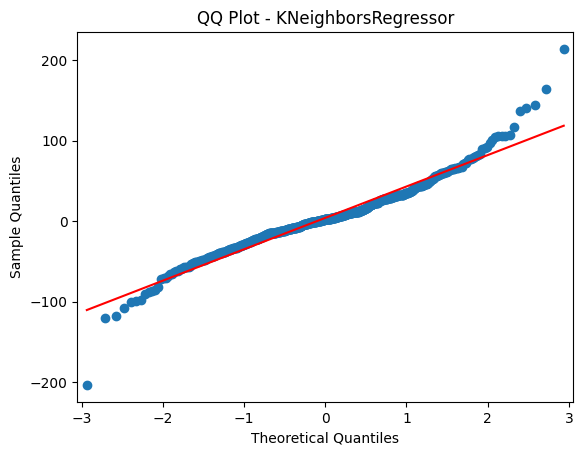

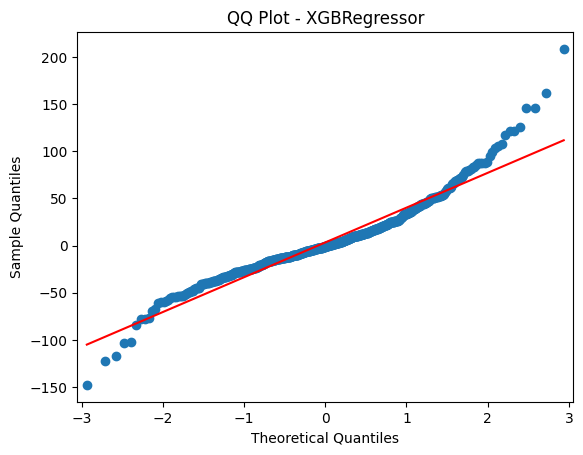

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create QQ plots for residuals
sm.qqplot(y_test - y_pred1, line='s')
plt.title('QQ Plot - RandomForestRegressor')
plt.show()

sm.qqplot(y_test - y_pred2, line='s')
plt.title('QQ Plot - KNeighborsRegressor')
plt.show()

sm.qqplot(y_test - y_pred3, line='s')
plt.title('QQ Plot - XGBRegressor')
plt.show()


assumption of normal distribution in a data set

Scale Location Plot

In [ ]:
residuals1 = abs(y_test - y_pred1)**0.5
residuals2 = abs(y_test - y_pred2)**0.5
residuals3 = abs(y_test - y_pred3)**0.5

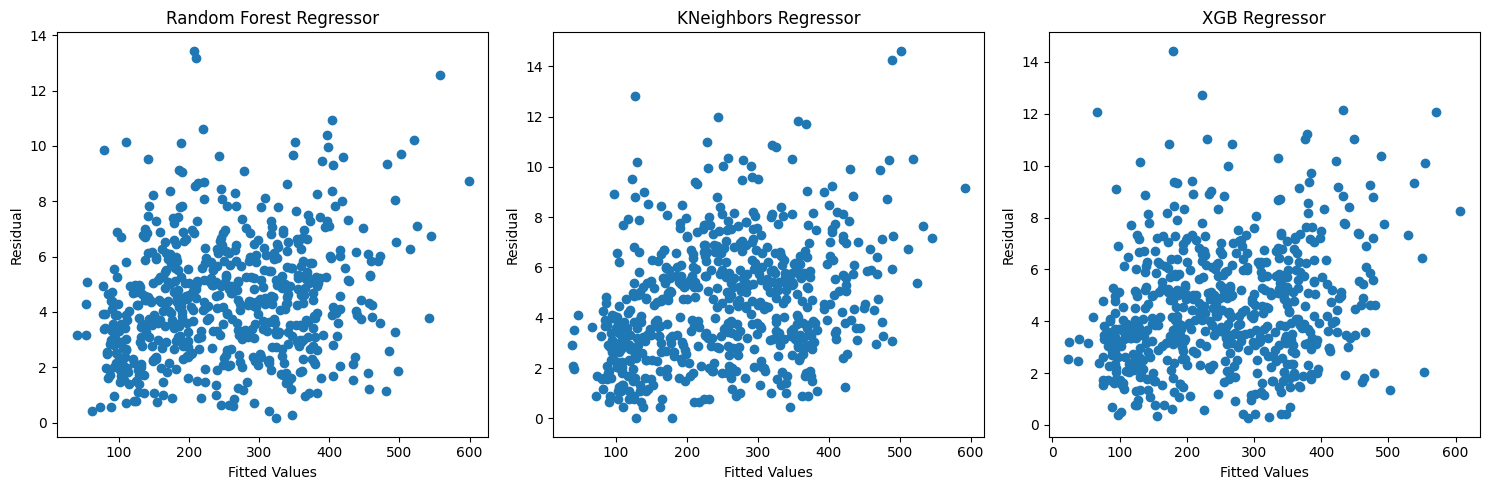

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Residual vs. Fitted Values for Prediction 1
axs[0].scatter(y_pred1, residuals1)
axs[0].set_title('Random Forest Regressor')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 2
axs[1].scatter(y_pred2, residuals2)
axs[1].set_title('KNeighbors Regressor')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residual')

# Scatter plot for Residual vs. Fitted Values for Prediction 3
axs[2].scatter(y_pred3, residuals3)
axs[2].set_title('XGB Regressor')
axs[2].set_xlabel('Fitted Values')
axs[2].set_ylabel('Residual')

# Show the plot
plt.tight_layout()
plt.show()

no heteroskedasticity
there should be no discernible pattern in the plot. This would imply that errors are normally distributed